In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

### Goal
The main objective of the analysis is the dimensionality reduction of the features we have, and the impact this one has on the accuracy of our model

### Dataset 
The dataset is acquired from the Kaggle website and includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom.The features of the dataset are the following: 
* cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
* cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
* cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
* bruises: bruises=t,no=f
* odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
* gill-attachment: attached=a,descending=d,free=f,notched=n
* gill-spacing: close=c,crowded=w,distant=d
* gill-size: broad=b,narrow=n
* gill-color:black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
* stalk-shape: enlarging=e,tapering=t
* stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
* stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
* stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
* stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
* stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
* veil-type: partial=p,universal=u
* veil-color: brown=n,orange=o,white=w,yellow=y
* ring-number: none=n,one=o,two=t
* ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
* spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
* population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
* habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

Each mushroom belongs to a class which is either p (for poisonous) or e (for edible)

In [2]:
path = 'data/mushrooms.csv'
data = pd.read_csv(path)

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.shape

(8124, 23)

In [5]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [6]:
from sklearn.preprocessing import LabelBinarizer

X = data.drop('class', axis = 1)

lb = LabelBinarizer().fit_transform(data['class'])
data['class'] = lb
y = data['class']

In [7]:
sum = 0
for col in X.columns:
    sum += len(X[col].unique())
'{} unique values in our features'.format(sum)

'117 unique values in our features'

#### Dummies - Convert the categorical features we have

In [43]:
features = pd.get_dummies(X, drop_first = True)
features.shape[1]

95

By dropping the first column of each feature we ended up with 95 new numerical features

#### K-means to see if can detect an elbow point

In [9]:
from sklearn.cluster import KMeans

Ks = [1, 2, 3, 4, 5, 6]
score = []
for k in Ks:
    km = KMeans(n_clusters = k).fit(features)
    score.append(pd.Series({'k':k, 'score':km.inertia_})) 
score = pd.DataFrame(score).rename(columns = {'score':'inertia'})

score

,k,inertia
0,1.0,73638.882816
1,2.0,62275.143278
2,3.0,54243.244848
3,4.0,48757.148939
4,5.0,45353.299158
5,6.0,42980.449540


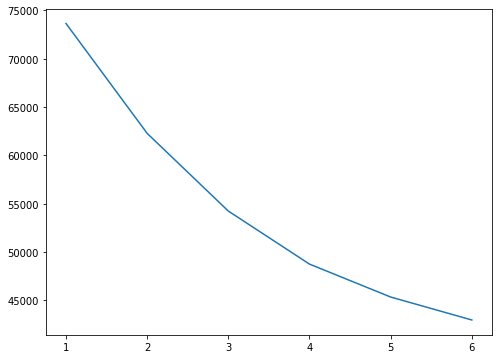

In [11]:
plt.figure(figsize = (8,6))
plt.plot(score.k, score.inertia)

We can't figure out where is the elbow point although we do know that we have 2 classes

#### Let's try k-means and Agglomerative-Clustering with 2 clusters to see if we can distinguish the 2 classes

In [88]:
from sklearn.cluster import AgglomerativeClustering

In [101]:
km = KMeans(n_clusters = 2).fit(features)

ag = AgglomerativeClustering().fit(features)

kmeans = pd.DataFrame([data['class'], km.labels_]).T.rename(columns = {'Unnamed 0':'kmeans'}).groupby(['class',
                                                                                             'kmeans']).size().to_frame().rename(columns={0:'km - number'})

agglomerative = pd.DataFrame([data['class'], ag.labels_]).T.rename(columns = {'Unnamed 0':'Agglomerative'}).groupby(['class',
                                                                                             'Agglomerative']).size().to_frame().rename(columns={0:'ag - number'})

In [104]:
pd.concat([kmeans, agglomerative['ag - number']], axis = 1).fillna(0).astype(int)

km - number  ag - number
0 0           32            0
  1         4176         4208
1 0         3098         3024
  1          818          892

In [100]:
data['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

Agglomerative Clustering did a better job on predicting the first class but worse on the second class (compared to kmeans algorithm)

#### Let's explore the correlations between our features

In [38]:
correlations = features.corr()

for pos in range(0, correlations.shape[0]):
    correlations.iloc[pos,pos] = 0.0
corr = pd.DataFrame([correlations.abs().idxmax(),
              correlations.abs().max()]).T.reset_index().rename(columns = {'index':'feature 1',
                                                                          0:'feature 2',
                                                                          1:'correlation'})

In [40]:
corr[corr.correlation > 0.7].sort_values('correlation', ascending = False)

,feature 1,feature 2,correlation
55,stalk-color-above-ring_o,stalk-color-below-ring_o,1
69,veil-color_y,stalk-color-above-ring_y,1
21,odor_m,stalk-color-above-ring_c,1
63,stalk-color-below-ring_o,stalk-color-above-ring_o,1
74,ring-type_n,odor_m,1
59,stalk-color-below-ring_c,odor_m,1
58,stalk-color-above-ring_y,veil-color_y,1
51,stalk-color-above-ring_c,odor_m,1
68,veil-color_w,stalk-color-above-ring_o,0.979302
71,ring-number_t,ring-number_o,0.968959


We can see above that too many features have very high correlation between them. That propably means that eliminating some of them does not necessarily means that we'll lose much info of our data 

#### Let's eliminate some of the features with PCA and observe the accuracy of a logistic regression model for different number of components

In [13]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, y, test_size = 0.3, random_state = 42)

# accuracy of the model as it is (with 96 features)

lr = LogisticRegression(n_jobs = -1, random_state = 42)
lr = lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
sc = accuracy_score(y_pred, y_test)


modelPCA = []
components = np.arange(2, 50, step = 5, dtype = int) #50
for n in components:
    PCAmodel = PCA(n_components = n)
    features_PCA = PCAmodel.fit_transform(features)
    
    x_train, x_test, y_train, y_test = train_test_split(features_PCA, y, test_size = 0.3, random_state = 42)
    
    lr = lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    modelPCA.append(pd.Series({'components':n,'accuracy':accuracy_score(y_pred, y_test)}))
modelPCA.append(pd.Series({'components':features.shape[1],'accuracy':sc}))
    
modelPCA = pd.DataFrame(modelPCA)

In [14]:
modelPCA

,components,accuracy
0,2.0,0.876948
1,7.0,0.940935
2,12.0,0.945447
3,17.0,0.972108
4,22.0,0.981542
5,27.0,0.989746
6,32.0,0.991386
7,37.0,0.991797
8,42.0,0.995488
9,47.0,0.997539


We can see that when after 30 features there is a little difference in our model accuracy

#### Let's do the same this time using kernelPCA 

In [15]:
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV

modelKPCA = []
components = np.arange(2, 50, step = 5, dtype = int) #50
lrk = LogisticRegression(n_jobs = -1, random_state = 42)


for n in components:
   
    KPCAmodel = KernelPCA(n_components = n, n_jobs = -1)
    features_PCA = KPCAmodel.fit_transform(features)

    x_train, x_test, y_train, y_test = train_test_split(features_PCA, y, test_size = 0.3, random_state = 42)
 
    lrk.fit(x_train, y_train)
    y_pred = lrk.predict(x_test)
    
    modelKPCA.append(pd.Series({'components':n,'accuracy':accuracy_score(y_pred, y_test)}))
modelKPCA.append(pd.Series({'components':features.shape[1],'accuracy':sc}))
    
modelKPCA = pd.DataFrame(modelKPCA)

In [16]:
modelKPCA

,components,accuracy
0,2.0,0.876948
1,7.0,0.940935
2,12.0,0.942986
3,17.0,0.971698
4,22.0,0.980312
5,27.0,0.989336
6,32.0,0.991386
7,37.0,0.991797
8,42.0,0.995898
9,47.0,0.997539


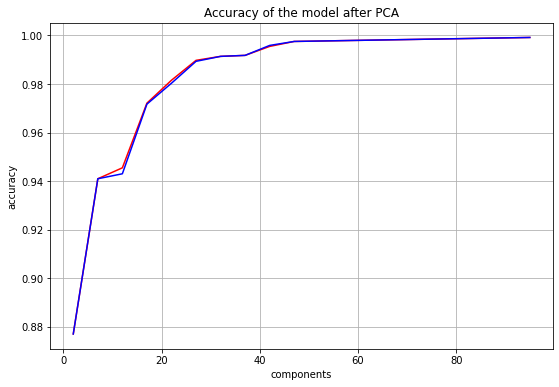

In [17]:
plt.figure(figsize = (9,6))
plt.plot(modelPCA.components, modelPCA.accuracy, color = 'red', label = 'PCA')
plt.plot(modelKPCA.components, modelKPCA.accuracy, color = 'blue', label = 'Kernel PCA')

plt.xlabel('components', size = 10);
plt.ylabel('accuracy', size = 10);
plt.title('Accuracy of the model after PCA')
plt.grid(True)

We can see that there is no difference between PCA and kernelPCA

#### We'll choose only 2 principal components and calculate the contribution of each initial feature to them 

In [18]:
PCAmodel = PCA(n_components = 2).fit(features)
PCAmodel.explained_variance_ratio_

array([0.17653548, 0.11252669])

In [19]:
weights = PCAmodel.explained_variance_ratio_.reshape(-1,1)/PCAmodel.explained_variance_ratio_.sum()
weights

array([[0.61071803],
       [0.38928197]])

In [20]:
contribution = (weights * abs(PCAmodel.components_)).sum(axis = 0)
contribution

array([1.48116393e-04, 4.21816322e-02, 7.07017725e-02, 1.89018500e-03,
       4.12754419e-02, 2.69998050e-04, 1.14041799e-01, 5.17544267e-02,
       1.18786606e-03, 5.52551115e-02, 9.15826656e-02, 8.60581322e-02,
       6.07344242e-03, 1.21276856e-04, 1.21276856e-04, 4.99222696e-02,
       9.27919276e-02, 2.29115896e-01, 7.61384297e-03, 2.01606263e-01,
       2.80913144e-02, 2.18807685e-03, 1.83033047e-01, 1.88696820e-02,
       6.57708018e-02, 6.57708018e-02, 8.16199534e-03, 6.32321928e-02,
       1.75489184e-01, 4.93293029e-03, 5.82902392e-02, 6.27940066e-02,
       2.32903001e-02, 6.53684376e-02, 2.80397273e-03, 4.92030748e-02,
       1.63687205e-03, 3.63915296e-02, 5.92725472e-02, 2.45632127e-03,
       1.19844870e-01, 1.87593412e-01, 3.65440439e-02, 6.51297572e-02,
       1.21625378e-02, 1.87327534e-01, 1.72299339e-01, 4.43803890e-04,
       1.86915636e-01, 1.69486723e-01, 7.26966658e-03, 2.18807685e-03,
       4.26201664e-03, 4.94467232e-02, 7.27358590e-02, 8.52510708e-03,
      

In [21]:
contr = pd.DataFrame([features.columns,
                      contribution]).T.rename(columns = {0:'feature', 
                                                         1:'contribution'})
top = contr.sort_values('contribution', ascending = False)
top.head(10)

,feature,contribution
75,ring-type_p,0.244432
17,bruises_t,0.229116
76,spore-print-color_h,0.215547
73,ring-type_l,0.211957
19,odor_f,0.201606
82,spore-print-color_w,0.195426
41,stalk-root_b,0.187593
45,stalk-surface-above-ring_k,0.187328
48,stalk-surface-below-ring_k,0.186916
22,odor_n,0.183033


<BarContainer object of 10 artists>

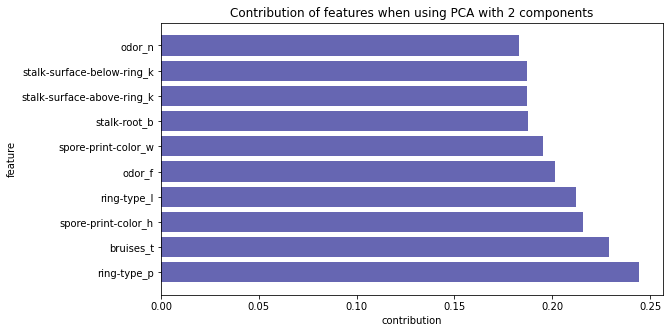

In [22]:
plt.figure(figsize = (9,5))
plt.xlabel('contribution') , plt.ylabel('feature')
plt.title('Contribution of features when using PCA with 2 components')
plt.barh(top['feature'].head(10), top['contribution'].head(10), color = 'navy', alpha = 0.6)

The above diagram includes the features of dummies. Let's find the contribution of the initial features before dummies

In [23]:
df = top.copy()
for i in range(0, df.shape[0]):
    df.feature.iloc[i] = df.feature.iloc[i][:-2]
    
topN = df.groupby('feature').sum().sort_values('contribution', ascending = False).reset_index()

In [24]:
topN.head()

,feature,contribution
0,spore-print-color,0.667500
1,odor,0.572944
2,ring-type,0.458882
3,stalk-color-above-ring,0.398457
4,stalk-color-below-ring,0.396539


<BarContainer object of 10 artists>

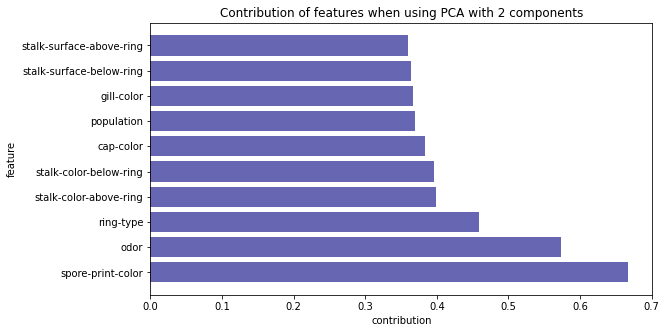

In [25]:
plt.figure(figsize = (9,5))
plt.xlabel('contribution') , plt.ylabel('feature')
plt.title('Contribution of features when using PCA with 2 components')
plt.barh(topN['feature'].head(10), topN['contribution'].head(10), color = 'navy', alpha = 0.6)

* We can see from the above diagram that if we decide to use only 2 principal components, the 'spore print color', the 'odor' and the 'ring type' have the biggest impact on them. 
* Also we saw that keeping around 20 principal components of the initial 95 there is a minor difference on our Logistic Regression model accuracy